In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

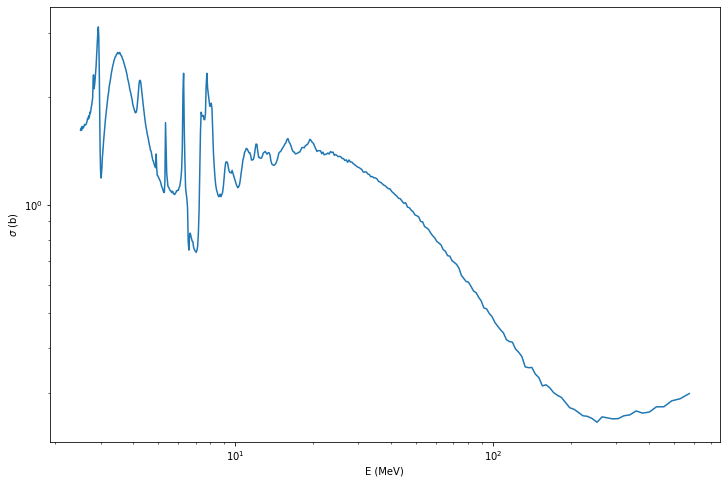

In [15]:
#Datos de la sección eficaz total para el n-12C tomados de EXFOR nuclear data library"
column_names = ["Columna1","Columna2", "$n$-$_{}^{12}$C", "Columna4", "Columna5"]
df = pd.read_csv("data 1. C.D.Pruitt.txt", delim_whitespace=True, header=None, names= column_names)

cross_section = df["$n$-$_{}^{12}$C"]
E = df["Columna1"]

plt.figure(figsize=(12, 8))
plt.plot(E, cross_section)
plt.xlabel("E (MeV)")
plt.ylabel("$\\sigma$ (b)")
plt.title("")
plt.xscale("log")
plt.yscale("log")
plt.grid(False)
plt.show()

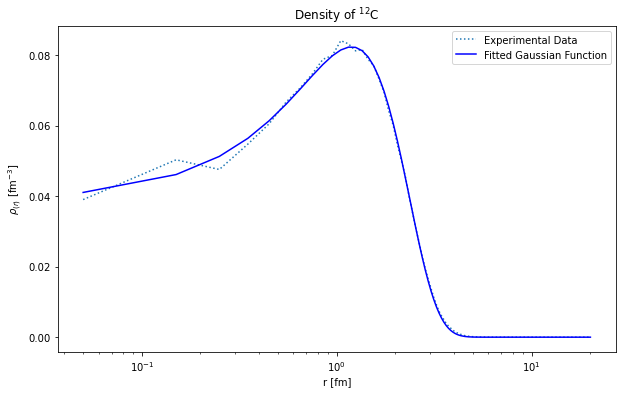

Parameters:
rho_0 = 0.0824 fm^(-3)
mu = 1.1926 fm
sigma = 0.9684 fm


In [16]:
#Datos de la densidad de carga del carbono 12 tomados de https://www.phy.anl.gov/theory/research/density/
densities = ["r", "$\\rho$", "error"]
df = pd.read_csv("density12C.txt", delim_whitespace=True, header=None, names=densities)

r = df["r"]
density = df["$\\rho$"]

def gaussian(r, rho_0, mu, sigma):
    return rho_0 * np.exp(-((r - mu)**2) / (2 * sigma**2))

initial_guess = [0.17, 2.5, 1.0]
params, params_covariance = curve_fit(gaussian, r, density, p0=initial_guess)

plt.figure(figsize=(10, 6))
plt.plot(r, density, linestyle="dotted", label="Experimental Data")
plt.plot(r, gaussian(r, *params), label="Fitted Gaussian Function", color="b")
plt.title("Density of $_{}^{12}$C")
plt.xlabel("r [fm]")
plt.ylabel("$\\rho_{(r)}$ [fm$^{-3}$]")
plt.xscale("log")
plt.legend()
plt.show()

print("Parameters:")
print(f"rho_0 = {params[0]:.4f} fm^(-3)")
print(f"mu = {params[1]:.4f} fm")
print(f"sigma = {params[2]:.4f} fm")